In [1]:
from helpers import *

2023-01-07 08:44:24.707788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-07 08:44:24.707827: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Get LATEST driver version for 94.0.4606
Trying to download new driver from https://chromedriver.storage.googleapis.com/94.0.4606.113/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/94.0.4606.113]


In [19]:
def get_links_Telegraph(search_url):
    list_links_Telegraph=[]
    driver.get(search_url)
    while True:
        links = driver.find_elements_by_xpath('//a[@class="list-headline__link u-clickable-area__link"]')
        for i in links: 

            list_links_Telegraph.append(i.get_attribute('href'))
        time.sleep(1)
        try: 
            next = driver.find_element_by_xpath('//a[@class="pagination__link pagination__link--next  "]')
            next.click()
            time.sleep(0.5)
        except :
            print("No more pages left")
            break
    return list_links_Telegraph

In [38]:
def get_html_the_telegraph(list_links):
    #Count
    extracted_articles=0 
    extracted_articles_fail=0
    for i in list_links: 
        driver.get(i)
        try:
            html = driver.page_source
        except: 
            extracted_articles_fail += 1
            print(f'Extracted failed articles: {extracted_articles_fail} ',end='\r')
            continue
        #We put -2 because it ends with a / and if we use -1 it takes a white space
        tail=i.split('/')[-2]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/THE_TELEGRAPH/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [21]:
def get_articles_Telegraph(list_links_Telegraph): 
    articles_list_Telegraph=[]
    extracted_articles=0 
    for i in list_links_Telegraph: 
        list_text=[]
    #     time.sleep(1)
        driver.get(i)
        title=driver.find_element_by_xpath('//h1').text
        try: 
            author=driver.find_element_by_class_name('e-byline__author').text
        except:
            author = 'error'
        try: 
            date =driver.find_element_by_xpath('//time[@class="e-published-date u-meta "]').text
        except: 
            date = 'error'
        texts = driver.find_elements_by_xpath('//div[@itemprop="articleBody"]/div/div/p')
        for element in texts:
            list_text.append(element.text)
        text=" ".join(list_text); 
        try: 
            subheadline = driver.find_element_by_xpath('//p[@class="e-standfirst u-heading-4 "]').text
        except: 
            subheadline = 'error'
        extracted_articles += 1
        print(f'Extracted articles: {extracted_articles} of {len(list_links_Telegraph)}',end='\r')
        articles_list_Telegraph.append({'Title': title, 
                              'Subheadline':subheadline,
                              'Text':text,
                              'Authors': author, 
                              'Date': date,
                              'Link':i})  
    return articles_list_Telegraph


In [22]:
#New function because there are some articles with differents tags in the date.
def get_date(list_links_NAN_date): 
    date_link_list=[]
    extracted_articles=0 
    for i in list_links_NAN_date: 
        driver.get(i)

        try: 
            date =driver.find_element_by_xpath('//time[contains(@class,"e-published-date")]').text
        except: 
            date = 'error'
        extracted_articles += 1
        print(f'Extracted articles: {extracted_articles} of {len(list_links_NAN_date)}',end='\r')
        date_link_list.append({
                              'Date': date,
                              'Link':i})  
    return date_link_list


In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u200b', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\ufeff', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

## THE TELEGRAPH

In [24]:
search_url='https://www.telegraph.co.uk/vaccination/'
email = ''
password = ''
driver.get(search_url)
driver.maximize_window() 
time.sleep(2)



In [28]:
#LOGIN
def login(): 
    driver.find_element_by_xpath('/html/body/div[7]/article/div/div[2]/a').click()
    time.sleep(2)
    driver.find_element_by_id("email").send_keys(email)
    driver.find_element_by_id('login-button').click()
    time.sleep(2)
    driver.find_element_by_id("password").send_keys(password)
    driver.find_element_by_id('login-button').click()

In [30]:
login()

In [ ]:
# list_links_Telegraph=get_links_Telegraph(search_url)

In [28]:
# len(list_links_Telegraph)
# # Store the list in a document
# with open("list_links_Telegraph.txt", 'w') as f:
#     for s in list_links_Telegraph:
#         f.write(str(s) + '\n')

In [41]:
# search_url='https://www.telegraph.co.uk/vaccines/'
# list_links_Telegraph_vaccines=get_links_Telegraph(search_url)

No more pages left


In [62]:
# # Store the list in a document
# with open("list_links_Telegraph_vacines.txt", 'w') as f:
#     for s in list_links_Telegraph_vaccines:
#         f.write(str(s) + '\n')

In [31]:
with open("list_links_Telegraph.txt", 'r') as f:
    list_links_Telegraph = [line.rstrip('\n') for line in f]

In [32]:
with open("list_links_Telegraph_vacines.txt", 'r') as f:
    list_links_Telegraph_vacines = [line.rstrip('\n') for line in f]

In [33]:

len(list_links_Telegraph), len(list_links_Telegraph_vacines)

(1419, 3168)

In [34]:
#CONCATENATE BOTH LISTS AND DROP DUPLICATES
list_links_Telegraph.extend(list_links_Telegraph_vacines)
list_links_Telegraph_all=list(set(list_links_Telegraph))
len(list_links_Telegraph_all)

3730

In [1]:
get_html_the_telegraph(list_links_Telegraph_all)

In [3]:
import os
list_articles_vaccination_Telegraph=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/THE_TELEGRAPH/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/THE_TELEGRAPH/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find_all("span",itemprop="name")[0].text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline = soup.find(itemprop="description").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        tf = soup.find_all(class_="articleBodyText section")
#         tf= soup.find_all("div",class_="component article-body-text")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text)
    except: 
        text= "error"
    list_articles_vaccination_Telegraph.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
articles_Telegraph = pd.DataFrame.from_dict(list_articles_vaccination_Telegraph)

In [5]:
articles_Telegraph

,Title,Subheadline,Text,Authors,Date,Link
0,Vaccine staff threatened after leftover doses ...,Derbyshire police confirmed they were investig...,Medical staff have received threats after dose...,Lizzie Roberts,2021-02-05T18:25+0000,https://www.telegraph.co.uk/news/2021/02/05/va...
1,Exclusive: Brexit may have helped UK win race ...,Decoupling from EU's regulatory and purchasing...,Brexit may have helped Britain win the race fo...,"Henry Bodkin,",2020-12-02T21:00+0000,https://www.telegraph.co.uk/news/2020/12/02/ex...
2,Failure to share Covid jabs a ‘historic moral ...,The WHO also released new estimates suggesting...,The failure of rich nations to share Covid-19 ...,"Jennifer Rigby,",2021-10-21T16:55+0100,https://www.telegraph.co.uk/global-health/scie...
3,Israel faces Covid surge as virus circulates e...,Delta variant blamed after clusters identified...,Israel has recommended vaccinating teenagers f...,"Campbell MacDiarmid,",2021-06-22T16:07+0100,https://www.telegraph.co.uk/news/2021/06/22/is...
4,Growing calls for release guidelines on market...,There are currently no formal rules governing ...,Pressure is growing for clear guidelines over ...,Julia Bradshaw,2020-11-23T05:00+0000,https://www.telegraph.co.uk/business/2020/11/2...
...,...,...,...,...,...,...
3662,Staff who refuse vaccine could be asked to wor...,This is one of several suggestions to help emp...,Staff who refuse to be vaccinated may be encou...,"Sam Meadows,",2021-02-12T19:00+0000,https://www.telegraph.co.uk/news/2021/02/12/st...
3663,Have you had the Covid vaccine or due to get o...,Whether you have received a coronavirus vaccin...,As Boris Johnson promises to 'ramp up' the UK’...,Telegraph Readers,2021-01-19T10:44+0000,https://www.telegraph.co.uk/news/0/have-had-co...
3664,Brexiteers can now show Remainers the tangible...,The EU tried to derail the UK's vaccination pr...,Damn that Macron! I was driving home when the ...,Allison Pearson,2021-02-02T19:00+0000,https://www.telegraph.co.uk/women/life/brexite...
3665,Forget future medicines – dementia patients ne...,In terms of quality of life for the foreseeabl...,An old friend and veteran of the psychiatry of...,Dr Michael Fitzpatrick,2021-06-14T05:00+0100,https://www.telegraph.co.uk/health-fitness/doc...


# Clean articles

In [6]:
articles_Telegraph['Text']=articles_Telegraph['Text'].apply(preprocessor)

In [7]:
articles_Telegraph['Title']=articles_Telegraph['Title'].apply(preprocessor)

In [8]:
# Links erroneos
articles_Telegraph=articles_Telegraph.drop(articles_Telegraph[articles_Telegraph['Link']=="error"].index, inplace=False)
# articles without text
articles_Telegraph=articles_Telegraph.drop(articles_Telegraph[articles_Telegraph['Text']==""].index, inplace=False)
# Articles that contains vaccination, vaccine... 
articles_Telegraph=articles_Telegraph.drop(articles_Telegraph[~articles_Telegraph['Text'].str.contains('vacc|Vacc|vax')].index,inplace=False)

In [9]:
articles_Telegraph['n_words'] = articles_Telegraph.Text.apply(lambda x: len(str(x).split(' ')))
articles_Telegraph.sort_values('n_words')

,Title,Subheadline,Text,Authors,Date,Link,n_words
3257,Punishing the young with vaccine passports is ...,We haven't sacrificed eighteen months of miser...,Scenes of joy in nightclubs around Britain may...,Olivia Utley,2021-07-29T17:48+0100,https://www.telegraph.co.uk/news/2021/07/29/pu...,44
808,"Covid-19 vaccine Q&A: Is it safe, what are the...",Dr Michael Fitzpatrick answers readers' questi...,With the roll-out of coronavirus vaccines set ...,Telegraph Video,2020-12-31T04:20+0000,https://www.telegraph.co.uk/news/2020/12/04/co...,79
2182,Britons may not be at front of queue for Oxfor...,Chief scientific adviser says 'all new vaccine...,"Subject to final approval, expected in the com...","Henry Bodkin,",2020-04-20T04:03+0100,https://www.telegraph.co.uk/news/2020/04/20/br...,80
399,Watch: The UK has hit its first vaccine roll o...,Ministers learned from previous mistakes and d...,The UK’s Covid-19vaccine programme has been a ...,"Laura Donnelly,",2021-02-15T09:00+0000,https://www.telegraph.co.uk/news/2021/02/15/wa...,85
2529,Watch: Why Boris Johnsons vaccine roll-out cou...,"With nearly 600,000 people jabbed on Saturday,...",Prime Minister Boris Johnsons pandemic premier...,"Camilla Tominey,",2021-02-01T15:59+0000,https://www.telegraph.co.uk/news/2021/02/01/wa...,89
...,...,...,...,...,...,...,...
1122,Covid-19 found in Spanish wastewater samples c...,error,Here are the big developments from today:Summe...,"Jasmine Cameron-Chileshe,",2020-06-26T23:07+0100,https://www.telegraph.co.uk/global-health/scie...,15064
1528,Warrington and Nottingham to move into highest...,error,Good evening. Here are some of the top stories...,"Georgina Hayes,",2020-10-26T19:00+0000,https://www.telegraph.co.uk/global-health/scie...,15509
1606,Reinfections mean questions over immunity are ...,error,Here are some of the key developments from aro...,Georgina Hayes,2020-08-25T23:00+0100,https://www.telegraph.co.uk/global-health/scie...,17028
1660,Boris Johnson confirms third national lockdown...,error,Good evening. Here is a roundup of another vas...,Dominic Penna,2021-01-04T22:21+0000,https://www.telegraph.co.uk/global-health/scie...,17087


In [10]:
articles_Telegraph['Newspaper']= 'The Telegraph'
articles_Telegraph['Country']= 'United Kingdom'

In [11]:
articles_Telegraph=articles_Telegraph.drop_duplicates()

In [12]:

articles_Telegraph=articles_Telegraph.drop(articles_Telegraph[articles_Telegraph['Date']<'2020-01-01'].index,inplace=False)

In [13]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_Telegraph.iterrows(): 
    try:
        articles_Telegraph['Date'][index] =datetime.strptime(articles_Telegraph['Date'][index][:16], '%Y-%m-%dT%H:%M').date()
    except: 
        continue
articles_Telegraph['Date'] = pd.to_datetime(articles_Telegraph['Date'])

/tmp/ipykernel_187853/1686485870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_Telegraph['Date'][index] =datetime.strptime(articles_Telegraph['Date'][index][:16], '%Y-%m-%dT%H:%M').date()


In [14]:
articles_Telegraph.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
1874,"‘Once rabies develops, there is no treatment’:...",error,The boys eyes are feverish and wild as he hype...,Ben Farmer,2020-01-07,https://www.telegraph.co.uk/global-health/scie...,1002,The Telegraph,United Kingdom
943,Surge in polio cases has reversed progress to ...,error,A surge in polio cases has reversed recent yea...,Ben Farmer,2020-01-10,https://www.telegraph.co.uk/global-health/scie...,398,The Telegraph,United Kingdom
2668,Cervical cancer cases soaring among women in t...,error,Cervical cancer cases are soaring among women ...,"Laura Donnelly,",2020-01-22,https://www.telegraph.co.uk/news/2020/01/22/ce...,528,The Telegraph,United Kingdom
141,Cervical cancer jab should be compulsory in ev...,The highly effective vaccine is a key tool in ...,But while just under half of countries worldwi...,"Sarah Newey,",2020-02-04,https://www.telegraph.co.uk/global-health/wome...,472,The Telegraph,United Kingdom
1490,Students told to get vaccinated as mumps outbr...,"Disease can cause swelling of the brain, testi...",The scare was first sparked in the early 1990s...,"Paul Nuki,",2020-02-14,https://www.telegraph.co.uk/global-health/scie...,641,The Telegraph,United Kingdom
...,...,...,...,...,...,...,...,...,...
2488,"I was lucky to be vaccinated, and especially i...",The beauty of the site and the chance to mingl...,"As a lay chaplain at Salisbury Cathedral, let ...",Catherine Neilan,2021-11-15,https://www.telegraph.co.uk/news/2021/01/18/lu...,565,The Telegraph,United Kingdom
1988,My first shift as a vaccine steward left me we...,Declaring oneself proud to be British these da...,Of all the places I could have been sent for m...,Richard Madeley,2021-11-15,https://www.telegraph.co.uk/family/life/first-...,878,The Telegraph,United Kingdom
1883,Covid booster jabs: When will over-40s get the...,A third shot of vaccine is seen as vital to st...,As the centrepiece of the UK’s strategy to cur...,"Sarah Newey,",2021-11-15,https://www.telegraph.co.uk/global-health/scie...,1510,The Telegraph,United Kingdom
106,Here in Australia we are paying a heavy price ...,Australia's Covid strategy is the envy of the ...,Australia’s success against Covid has seen it ...,Joe Wallen,2021-11-15,https://www.telegraph.co.uk/news/2021/02/15/au...,546,The Telegraph,United Kingdom


In [15]:
# articles_Telegraph.reset_index(inplace=True)
articles_Telegraph.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_TheTelegraph_last_16_11.csv',index = False)

In [2]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_TheTelegraph_last_16_11.csv')

# NER

In [6]:
df_ner= ner(df.Text,"en_core_web_sm")

In [7]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [8]:
df_ner.Label.unique()

array(['WORK_OF_ART', 'DATE', 'ORG', 'CARDINAL', 'MONEY', 'PERSON',
       'TIME', 'FAC', 'PERCENT', 'NORP', 'GPE', 'PRODUCT', 'QUANTITY',
       'LOC', 'LAW', 'ORDINAL', 'EVENT', 'LANGUAGE'], dtype=object)

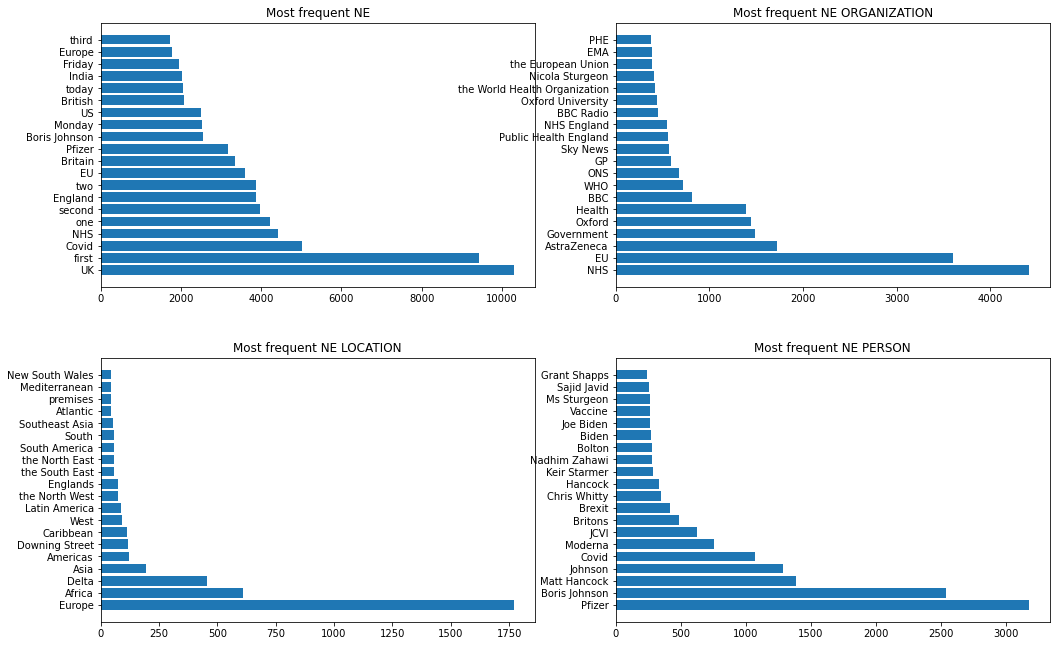

In [9]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
fig.tight_layout(pad=5.0)
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PERSON"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PERSON"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')
fig.savefig('TOP_NE_THE_TELEGRAPH.png',dpi=300, bbox_inches = "tight")